In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

בסיס נתונים זה מספק סקירה מקיפה של גורמים שונים המשפיעים על ביצועי התלמידים במבחנים. היא כוללת מידע על הרגלי למידה, נוכחות, מעורבות הורית והיבטים נוספים המשפיעים על ההצלחה האקדמית

מטרת ניתוח הנתונים של קובץ זה הוא זיהוי גורמים המשפיעים על ביצועי תלמידים: לזהות אילו גורמים (מבין אלו הכלולים בקובץ הנתונים) קשורים באופן מובהק לביצועי התלמידים במבחנים

In [2]:
df=pd.read_csv("StudentPerformanceFactors.csv")

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


**שאלות מחקר**

1. האם קיים קשר בין סוג בית הספר (ציבורי או פרטי) לבין רמת ההכנסה של משפחות התלמידים? 

2. האם קיימים הבדלים בציון המבחן הסופי בין תלמידים עם לקויות למידה לבין תלמידים ללא לקויות למידה?

3. האם קיים קשר בין רמת המוטיבציה של תלמידים לבין ציוני הבחינה הסופית שלהם?

4. האם המרחק בין מקום המגורים למוסד הלימודים בשילוב רמת המוטיבציה של התלמידים משפיע על שיעור הנוכחות שלהם?

5. כיצד משפיעים כמות השיעורים הפרטיים יחד עם מספר שעות הלמידה העצמית על ציוני המבחן הסופי של התלמידים?  

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**ניתוח סטטיסטי תיאורי**

In [6]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


ניתן להסיק מהפלט כמה מסקנות: 
ישנה סטיית תקן גבוהה יחסית בשדה של ציונים קודמים ובנוכחות מה שמראה על פיזור גבוה
ובציון המבחן הערך המקסימלי הוא 101 מה שלא נראה הגיוני, יכולה להיות טעות בהזנת הנתונים

החלטנו לא לגעת בנתוני אחוזי הנוכחות והציונים הקודמים למרות שסטיית התקן גבוהה ומעידה על פיזור גבוה מאחר ולדענו פיזור כזה הוא הגיוני בנתונים מסוג זה. בציונים תמיד יכולים להיות תלמידים שקיבלו ציונים גבוהים או תלמידים שקיבלו ציונים נמוכים ובנוכחות יתכן ויש תלמידים המגיעים בצורה עקבית וכאלו הבוחרים להגיע פחות 

In [8]:
df.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


מהפלט ניתן להסיק כי
רוב התלמידים מעידים שהוריהם מתערבים במידה בינונית, הגישה שלהם למקורות בינונית, רובם משתתפים בפעילויות חוץ לימודיות, רמת המוטיבציה שלהם בינונית, לרובם קיימת גישה לאינטרנט, רמת ההכנסה של רוב המשפחות נמוכה, לדעת הרוב רמת המורים בינונית, רוב בתי הספר שלומדים בהם הם ציבוריים, רובם מעידים על השפעה חיובית מחברים, רובם טוענים שאין להם בעיות למידה, רמת השכלה של רוב ההורים היא תיכונית, בית הספר קרוב לרוב ביתם של התלמידים ורובם גברים

**ניקוי נתונים**

In [13]:
#נחפש את השורות שהערך שלהן בציון המבחן הסופי מעל 100
df.query("Exam_Score>100")

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [6]:
#נחליף את הערך 101 ב100 בשורות בהן ערך הציון במבחן הסופי הוא 101
#ראינו שיש רק שורה אחת עם ערך 101 בציון המבחן הסופי
df.Exam_Score.replace(101,100,inplace=True)

C:\Users\corot\AppData\Local\Temp\ipykernel_30440\4186891393.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Exam_Score.replace(101,100,inplace=True)


In [15]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235508
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.889161
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,100.000000


נוכל לראות שכעת הערך המקסימלי לאחר ההחלפה בציון המבחן הוא 100 ולא 101 כמו קודם לכן

**טיפול בערכי Null**

In [33]:
#נבדוק מה הערך השכיח ביותר ברמת המורים
#נבדוק שאין יותר מערך שכיח אחד
top_Teacher_Quality=df.Teacher_Quality.mode()

In [34]:
top_Teacher_Quality

0    Medium
Name: Teacher_Quality, dtype: object

In [35]:
#יצא ערך שכיח יחיד, נקח אותו
top_Teacher_Quality=df.Teacher_Quality.mode()[0]

In [36]:
top_Teacher_Quality

'Medium'

In [37]:
#נחליף ערכים ריקים בעמודה של רמת המורים ברמת המורים השכיחה ביותר
df["Teacher_Quality"] = df["Teacher_Quality"].fillna(top_Teacher_Quality)

In [39]:
#נבדוק מה הערך השכיח ביותר ברמת השכלה של ההורים
#נבדוק שאין יותר מערך שכיח אחד
top_Parental_Education_Level=df.Parental_Education_Level.mode()

In [40]:
top_Parental_Education_Level

0    High School
Name: Parental_Education_Level, dtype: object

In [41]:
#יצא ערך שכיח יחיד, נקח אותו
top_Parental_Education_Level=df.Parental_Education_Level.mode()[0]

In [42]:
top_Parental_Education_Level

'High School'

In [43]:
#נחליף ערכים ריקים בעמודה של רמת השכלת הורים ברמת ההשכלה השכיחה ביותר
df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna(top_Parental_Education_Level)

In [45]:
#נבדוק מה הערך השכיח ביותר במרחק מהבית
#נבדוק שאין יותר מערך שכיח אחד
top_Distance_from_Home=df.Distance_from_Home.mode()

In [46]:
top_Distance_from_Home

0    Near
Name: Distance_from_Home, dtype: object

In [47]:
#יצא ערך שכיח יחיד, נקח אותו
top_Distance_from_Home=df.Distance_from_Home.mode()[0]

In [48]:
top_Distance_from_Home

'Near'

In [49]:
#נחליף ערכים ריקים בעמודה של מרחק מהבית במרחק מהבית השכיח ביותר
df["Distance_from_Home"] = df["Distance_from_Home"].fillna(top_Distance_from_Home)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

לאחר כל ההחלפות האחרונות נוכל לראות שאין ערכים ריקים יותר בטבלה

**ניתוח מתקדם**

In [62]:
#נבדוק ממוצע ציונים במבחן סופי לפי סוג בית הספר
average_score_by_school = df.groupby('School_Type')['Exam_Score'].mean()
average_score_by_school.to_frame()

,Exam_Score
School_Type,
Private,67.287705
Public,67.212701


נוכל להסיק מהתוצאות שהפער בין ממוצע הציונים במבחן הסופי בבית ספר פרטי לבין בית ספר ציבורי זניח ביותר - ממוצע הציונים בבית ספר פרטי ממש במעט גבוהים יותר 

In [69]:
#נבדוק ממוצע ציונים במבחן סופי לפי מגדר וסוג בית ספר
average_score_by_gender_school = df.groupby(['Gender', 'School_Type'])['Exam_Score'].mean()
average_score_by_gender_school.to_frame()

Exam_Score
Gender School_Type            
Female Private       67.300119
       Public        67.220513
Male   Private       67.278731
       Public        67.206949

נוכל להסיק מהתוצאות שממוצע הציונים של נשים במבחן הסופי טיפה יותר גבוה מאשר של גברים הן בבית ספר פרטי והן בציבורי ובתוך שתי קבוצות המגדר ממוצע הציונים בבית ספר פרטי טיפה גבוה יותר (ראינו גם בניתוח הקודם) אך שוב, באופן זניח ביותר

In [105]:
#נבדוק ממוצע, מקסימום ומינימום של שעות לימוד לפי גישה לאינטרנט - יש או אין
study_Hours_by_internetA = df.groupby('Internet_Access')['Hours_Studied'].agg(['mean', 'min', 'max'])
study_Hours_by_internetA

,mean,min,max
Internet_Access,,,
No,19.869739,4,39
Yes,19.983955,1,44


נוכל להסיק מהתוצאות שממוצע שעות הלימוד גבוה יותר כאשר יש גישה לאינרנט. בנוסף, נוכל להסיק כי מספר השעות המינימלי כאשר יש גישה לאינטרנט קטן יותר והמקסימלי גדול יותר מאשר כאשר אין גישה לאינטרנט

In [94]:
#נבדוק ממוצע ציונים במבחן סופי ושעות לימוד לפי בעיות למידה - יש או אין  
learning_disabilities = df.groupby('Learning_Disabilities').agg({'Exam_Score': 'mean','Hours_Studied': 'mean'})
learning_disabilities   

,Exam_Score,Hours_Studied
Learning_Disabilities,,
No,67.348951,20.004905
Yes,66.270504,19.723741


נוכל להסיק מהתוצאות שממוצע הציונים במבחן הסופי של תלמידים עם בעיות למידה נמוך יותר מאשר של מי שאין לו בעיות למידה ובהתאמה גם ממוצע שעות הלימוד של התלמידים בעלי בעיות למידה קטן יותר מאשר של אלו ללא בעיות למידה  

In [88]:
#נבדוק כמות תלמידים לפי רמות הכנסת הורים בסוגי בתי הספר השונים
pivot_table = pd.pivot_table(df, index='School_Type', columns='Family_Income', aggfunc='count', values='Gender')
pivot_table

Family_Income,High,Low,Medium
School_Type,,,
Private,373,833,803
Public,896,1839,1863


נוכל להסיק מהתוצאות שבבתי ספר ציבוריים רוב התלמידים באים מרקע של הורים בעלי הכנסה נמוכה או בינונית וכך גם בבתי ספר פרטיים ובכלל באופן כללי לא ללא תלות ברמת הכנסה של הורים  רוב התלמידים לומדים בבתי ספר ציבוריים ופחות לומדים בבתי ספר פרטיים

In [106]:
#נבדוק ממוצע ציון במבחן הסופי לפי סוג השפעת חברים 
Exam_Score_by_Peer_Influence = df.groupby('Peer_Influence')['Exam_Score'].mean()
Exam_Score_by_Peer_Influence.to_frame()

,Exam_Score
Peer_Influence,
Negative,66.564270
Neutral,67.197917
Positive,67.622820


נוכל להסיק מהתוצאות שכאשר יש השפעה שלילית של חברים ממוצע הציונים במבחן הסופי נמוך יותר מאשר כאשר ההשפעה ניטרלית או חיובית 

In [107]:
#נבדוק ממוצע ציון במבחן הסופי לפי רמת מורים
Exam_Score_by_Teacher_Quality = df.groupby('Teacher_Quality')['Exam_Score'].mean()
Exam_Score_by_Teacher_Quality.to_frame()

,Exam_Score
Teacher_Quality,
High,67.676425
Low,66.753425
Medium,67.100175


נוכל להסיק מהתוצאות שכאשר רמת המורים נמוכה ממוצע הציונים במבחן הסופי של התלמידים נמוכה ביחס לממוצע ציונים של התלמידים כאשר רמת המורים בינונית וגבוה. הציונים הגבוהים ביותר הם כאשר רמת המרצים גבוה

In [32]:
#נבדוק ממוצע ציונים במבחן הסופי ובמבחנים קודמים ביחס לכמות שעות תגבור
Exams_Score_by_Tutoring_Sessions = df.groupby('Tutoring_Sessions').agg({'Exam_Score': 'mean','Previous_Scores': 'mean'})
Exams_Score_by_Tutoring_Sessions

,Exam_Score,Previous_Scores
Tutoring_Sessions,,
0,66.489755,75.668209
1,66.980266,74.816888
2,67.567010,75.290479
3,67.894737,74.240431
4,68.229236,74.235880
5,69.067961,75.582524
6,71.666667,82.611111
7,69.857143,80.714286
8,69.000000,78.000000


נוכל להסיק מהתוצאות שבממוצע הציונים של המבחן הסופי עד 6 מפגשי תגבור ככל שנעשו יותר מפגשים כך ממוצע הציונים היה גבוה יותר ומ6 והלאה לא הייתה עליה ואף ירידה בממוצע. לעומת זאת, בממוצע ציונים של מבחנים קודמים עד חמישה מפגשים ממוצעי הציונים כמעט אותו הדבר ורק בין 6 ל7 מפגשים רואים עליה בממוצע. ב8 מפגשים יש ירידה בממוצע הציונים ביחס ל6 ו7 מפגשים בציונים במבחנים קודמים

In [31]:
# נבדוק ממוצע אחוז הגעה לשיעורים לפי מרחק בית הספר לבית התלמיד ולפי רמת מוטיבציה
Attendance_by_Distance_from_Home=df.groupby(['Motivation_Level','Distance_from_Home'])['Attendance'].mean()
Attendance_by_Distance_from_Home.to_frame()

Attendance
Motivation_Level Distance_from_Home            
High             Far                  77.901408
                 Moderate             79.469543
                 Near                 80.231565
Low              Far                  79.043243
                 Moderate             79.456628
                 Near                 80.345778
Medium           Far                  80.314199
                 Moderate             80.251762
                 Near                 80.042296

נוכל להסיק שעבור כל רמות המוטיבציה השוני בשיעור ההשתפות בשיעורים בין המרחקים של בית התלמיד לבית הספר זניח  

In [119]:
#נבדוק רמת התערבות הורית בחיי הילד לפי רמות השכלת ההורים
pivot_table2=pd.pivot_table(df, index='Parental_Education_Level', columns='Parental_Involvement', aggfunc='count', values='Gender')
pivot_table2

Parental_Involvement,High,Low,Medium
Parental_Education_Level,,,
College,594,414,981
High School,949,654,1710
Postgraduate,365,269,671


נוכל להסיק מהתוצאות שרוב ההורים לא משנה מה רמת השכלתם מעדיפים להתערב בצורה מאוזנת (בינונית) בחיי ילדיהם. בנוסף, נוכל לראות שרמת התערבות גבוהה באה לידי ביטוי בעיקר אצל הורים עם רמת השכלה תיכונית

**ויזואליזציות**

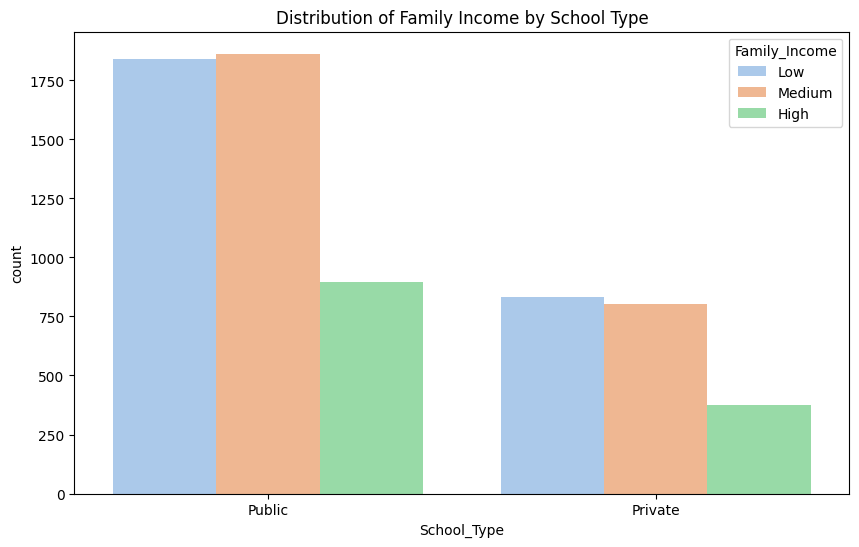

In [8]:
#גרף עמודות כמות תלמידים בבתי ספר שונים לפי רמות הכנסה של משפחתם
pastel_colors = sb.color_palette("pastel")
sb.set_palette(pastel_colors)
plt.figure(figsize=(10, 6))
sb.countplot(x='School_Type', hue='Family_Income', data=df)
plt.title('Distribution of Family Income by School Type')
plt.show()

ויזואליזציה זו עונה לנו על **שאלת המחקר הראשונה** שלנו בהמשך לניתוח שביצענו גם קודם לכן בנושא. המסקנות לגבי שאלת המחקר מויזואליזציה זו ומהניתוח הדומה שביצענו הן

1. ניתן לזהות קשר בין סוג בית הספר לבין רמת ההכנסה של המשפחות

2. בבתי ספר ציבוריים – מרבית התלמידים מגיעים ממשפחות בעלות הכנסה נמוכה ובינונית

3.  בבתי ספר פרטיים – אמנם גם כאן יש ייצוג למשפחות בעלות הכנסה נמוכה ובינונית, אך באופן יחסי כמותן קטנה יותר מאשר בייצוג שלהן בבתי ספר ציבוריים

4. משפחות בעלות הכנסה גבוהה אינן מהוות רוב בבתי הספר הפרטיים, מה שעשוי להעיד על כך שסוגי בתי הספר אינם מופרדים באופן מוחלט לפי הכנסה, אך כן קיימת מגמה ברורה של פערים כלכליים

לסיכום, נראה שיש קשר בין בין סוג בית הספר (ציבורי או פרטי) לבין רמת ההכנסה של משפחות התלמידים. בתי ספר ציבוריים מאופיינים באחוז גבוה יותר של תלמידים ממשפחות בעלות הכנסה נמוכה ובינונית, בעוד שבבתי ספר פרטיים שיעור התלמידים ממשפחות אלו נמוך יותר. בנוסף, ניתן לראות כי גם בבתי ספר ציבוריים וגם בפרטיים יש ייצוג למשפחות בעלות הכנסה גבוהה, אך מספרן נמוך יחסית. ממצאים אלו עשויים להעיד על כך שהכנסה גבוהה אינה הגורם המרכזי הקובע את הבחירה בין מוסד ציבורי לפרטי, אך כן קיימת מגמה כללית של פערים חברתיים-כלכליים המשפיעים על מערכת החינוך

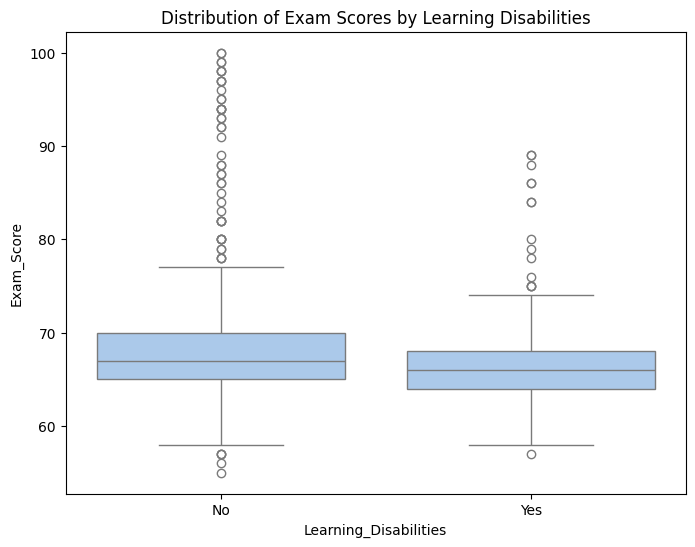

In [9]:
# גרף קופסאות של ציונים במבחן הסופי לפי בעיות למידה
plt.figure(figsize=(8, 6))
sb.boxplot(x='Learning_Disabilities', y='Exam_Score', data=df)
plt.title('Distribution of Exam Scores by Learning Disabilities')
plt.show()

ויזואליזציה זו עונה לנו על **שאלת המחקר השניה** שלנו בהמשך לניתוח שביצענו גם קודם לכן בנושא. המסקנות לגבי שאלת המחקר מויזואליזציה זו ומהניתוח הדומה שביצענו הן

1. תלמידים ללא לקויות למידה השיגו ממוצע ציונים מעט גבוה יותר לעומת תלמידים עם לקויות למידה

2. התפלגות הציונים בקרב תלמידים ללא לקויות למידה רחבה יותר, עם מספר גבוה של ציונים גבוהים במיוחד (outliers)

3. אצל תלמידים עם לקויות למידה ההתפלגות קצת צרה יותר, והציונים נוטים להיות מרוכזים בטווח נמוך יותר יחסית

4. למרות שקיימים גם תלמידים עם לקויות למידה שהשיגו ציונים גבוהים, הם מעטים יחסית

לסיכום, נראה שקיימים הבדלים בציון המבחן הסופי בין תלמידים עם לקויות למידה לבין אלו שאין להם. הנתונים מצביעים על כך שתלמידים עם לקויות למידה נוטים להשיג ציונים נמוכים יותר במבחנים בהשוואה לתלמידים ללא לקויות, אך קיימת חפיפה בין הקבוצות שמעידה על שונות אישית בהישגים

<Figure size 1000x600 with 0 Axes>

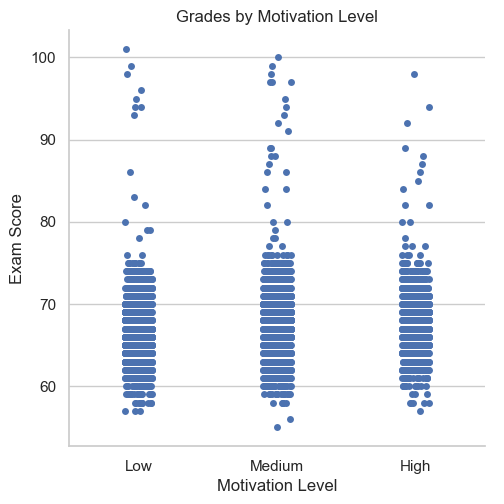

In [20]:
# גרף קטגוריאלי להצגת הקשר בין רמות מוטיבציה לציונים במבחן הסופי 
plt.figure(figsize=(10, 6))
sb.catplot(data=df, x="Motivation_Level", y="Exam_Score")
plt.title('Grades by Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.show()

ויזואליזציה זו עונה לנו על **שאלת המחקר השלישית** שלנו. המסקנות לגבי שאלת המחקר מויזואליזציה זו הן

1. התפלגות ציונים דומה בכל הרמות – התפלגות ציוני הבחינה נראית דומה בין שלוש קבוצות המוטיבציה (נמוכה, בינונית, גבוהה), כאשר רובה המכריע של הציונים נמצא בטווח שבין 60 ל־80

2. ציונים גבוהים קיימים בכל רמות המוטיבציה – קיימים תלמידים שקיבלו ציונים גבוהים מאוד (מעל 90 ואף 100) בכל אחת מרמות המוטיבציה, כולל בקבוצת המוטיבציה הנמוכה. זה עשוי להעיד על כך שמוטיבציה אינה הגורם היחיד המשפיע על הישגים

3. אין מגמה ברורה של שיפור בציונים עם עליית רמת המוטיבציה – לא ניתן לזהות מגמה חד־משמעית של עלייה בציוני הבחינה ככל שרמת המוטיבציה עולה. ציונים גבוהים ונמוכים מופיעים בכל שלוש הקבוצות

לסיכום, הגרף מצביע על כך שאין קשר מובהק וברור בין רמת המוטיבציה לבין ציוני הבחינה. ייתכן שישנם גורמים נוספים (כמו כישורים קוגניטיביים, סביבה לימודית, או תמיכה חיצונית) שמשפיעים על ההישגים יותר מאשר רמת המוטיבציה בלבד

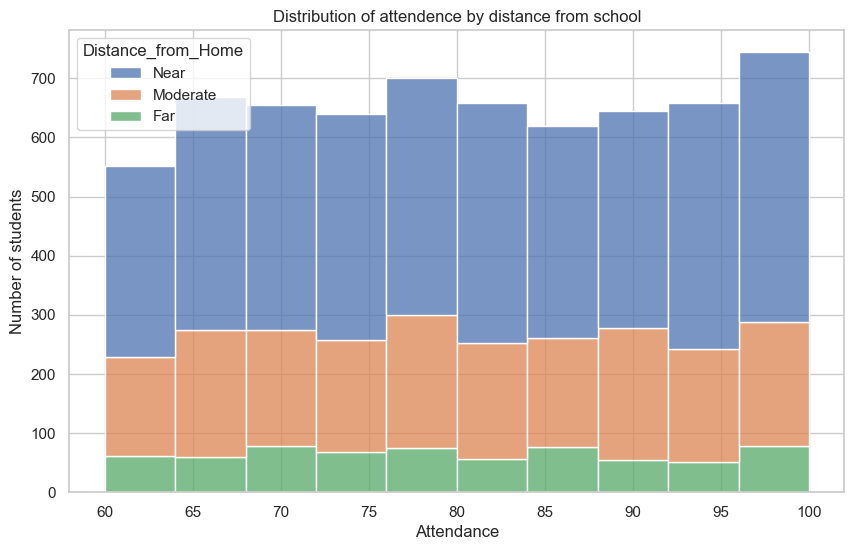

In [14]:
#  היסטוגרמת התפלגות נוכחות לפיי קרבה לבית הספר 
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x='Attendance', hue='Distance_from_Home', bins=10, kde=False, multiple='stack')  
plt.title('Distribution of attendence by distance from school')
plt.xlabel('Attendance')
plt.ylabel('Number of students')
plt.show()

ויזואליזציה זו בתוספת הניתוח בנושא שביצענו קודם לכן (כולל רמת המוטיבציה) עונה לנו על **שאלת המחקר הרביעית** שלנו. המסקנות לגבי שאלת המחקר מויזואליזציה זו ומהניתוח שביצענו הן

1. רוב התלמידים גרים קרוב למוסד הלימודים, כמעט בכל עמודה, הקבוצה הכי גדולה היא ה"כחולה" זה מצביע על כך שלרוב הסטודנטים הקרבה לבית גבוהה

2. לתלמידים שגרים רחוק יש נוכחות נמוכה יחסית - השכבה הירוקה קטנה בכל הטווחים. אין כמעט תלמידים שגרים רחוק ויש להם נוכחות גבוה כלומר יתכן ויש קשר בין נוכחות נמוכה למרחק גדול  

3. ההתפלגות יחסית יציבה עבור קבוצות הקרבה. הקבוצות של מרחק קרוב וממוצע שומרות על פרופורציה דומה. כלומר, לא נראית עליה או ירידה דרמטית בקרבה ככל שאחוז הנוכחות עולה 

4. אם נסתכל גם על הגרף וגם על הניתוח שביצענו קודם לכן בשילוב רמת המוטיבציה לא נראה שהשילוב בין מרחק מגורים לרמת מוטיבציה משפיע באופן חזק על אחוזי נוכחות התלמידים. גם בתרחישים הקשים למשל רחוק + רמת מוטיבציה נמוכה ממוצע הנוכחות עדיין סביר ודי קרוב ליתר הקבוצות. אמנם יש סימנים לכך שתלמידים שגרים קרוב מופיעים יותר אך ההבדלים קטנים והמוטיבציה כמעט לא נראית כמשפיעה

לסיכום, השילוב בין מרחק לרמת מוטיבציה לא מצביע על השפעה בולטת – אין דפוס ברור שמראה ששיעור הנוכחות מושפע במיוחד כאשר תלמידים עם מוטיבציה נמוכה גרים רחוק, או שתלמידים עם מוטיבציה גבוהה וקרבה לבית הספר משתתפים יותר. הנתונים יציבים יחסית בכל השילובים

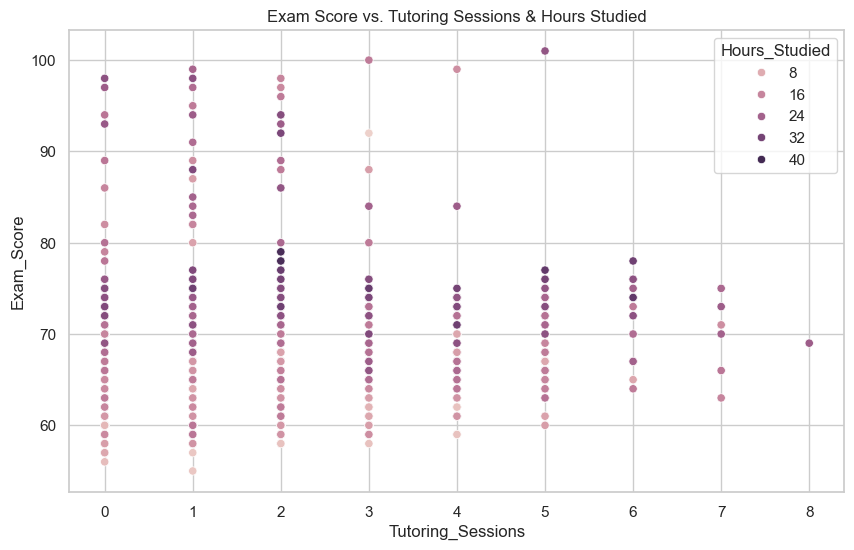

In [16]:
#גרף פיזור של ציוני הבחינה לפי מספר השיעורים הפרטיים בצירוף שעות הלמידה העצמית
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Tutoring_Sessions', y='Exam_Score',hue='Hours_Studied', data=df)
plt.title('Exam Score vs. Tutoring Sessions & Hours Studied')
plt.show()


ויזואליזציה זו עונה לנו על **שאלת המחקר החמישית** שלנו. המסקנות לגבי שאלת המחקר מויזואליזציה זו הן

1. שעות למידה עצמאית משפיעות באופן מובהק על ציוני הבחינה הסופית - תלמידים שלמדו יותר (צבע כהה יותר) נוטים להשיג ציונים גבוהים יותר, ללא קשר ברור למספר השיעורים הפרטיים  

2. כמות שיעורים פרטיים אינה מציגה מגמה ברורה של שיפור ציונים במבחן הסופי - ציונים גבוהים מופיעים גם בקרב תלמידים שלא קיבלו כלל שיעור פרטי וגם בקרב אלו שלא קיבלו מספר גבוה של שיעורים פרטיים. כלומר, אין עדות לכך שכמות השיעורים הפרטיים לבדם משפרת ציונים בצורה עקבית. 

לסיכום, נראה שהשילוב בין שעות למידה רבות ושיעורים פרטיים יכולים להביא לתוצאות טובות. תלמידים עם מספר שיעורים פרטיים בינוני נמוך (0-3) שלמדו הרבה (צבע כהה) הם לרוב בעלי ציונים גבוהים יותר במבחן הסופי מה שמרמז שייתכן ששילוב מתון של שיעורים פרטיים יחד עם למידה עצמית יעילה תורם יותר מכמות שיעורים פרטיים גבוהה ללא לימוד עצמי 